<a href="https://colab.research.google.com/github/Oz-art/Leaf-Classification/blob/master/leaf_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/dataset/

/content/drive/.shortcut-targets-by-id/1rSH6TO8vo9ZBtgp9IawCTkiXdv2Yj-DC/dataset


In [3]:
ls

GMB_01/  GMB_03/  GMB_05/  GMB_07/  GMB_09/  GMB_11/
GMB_02/  GMB_04/  GMB_06/  GMB_08/  GMB_10/  nonGMB/


In [4]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [5]:
!mkdir "/content/used_dataset"

mkdir: cannot create directory ‘/content/used_dataset’: File exists


In [6]:
!cp -av GMB_06 GMB_07 GMB_08 GMB_09 GMB_10 "/content/used_dataset"

'GMB_06/IMG_20200814_133710_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133710_HDR.jpg'
'GMB_06/IMG_20200814_133822_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133822_HDR.jpg'
'GMB_06/IMG_20200814_133857_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133857_HDR.jpg'
'GMB_06/IMG_20200814_133932_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133932_HDR.jpg'
'GMB_06/IMG_20200814_133954_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_133954_HDR.jpg'
'GMB_06/IMG_20200814_134044_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134044_HDR.jpg'
'GMB_06/IMG_20200814_134222_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134222_HDR.jpg'
'GMB_06/IMG_20200814_134321_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134321_HDR.jpg'
'GMB_06/IMG_20200814_134411_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134411_HDR.jpg'
'GMB_06/IMG_20200814_134512_HDR.jpg' -> '/content/used_dataset/GMB_06/IMG_20200814_134512_HDR.jpg'
'GMB_06/IM

In [7]:
%cd "/content"

/content


In [8]:
!pwd

/content


In [9]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
# the_dataset_folder=["GMB_06", "GMB_07", "GMB_08", "GMB_09", "GMB_10"]
imagePaths = paths.list_images("used_dataset")
data = []
labels = []

[INFO] loading images...


In [10]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((224, 224))) / 255.0
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [11]:
labels

['GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',
 'GMB_06',

In [12]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [13]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [14]:
print(labels)

[[1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [15]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(441, 224, 224, 3)
(147, 224, 224, 3)


In [16]:
from keras.applications.resnet50 import ResNet50
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, BatchNormalization

In [17]:
from keras.layers import Dropout
base_model = ResNet50(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
out = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=out)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [18]:
for layer in base_model.layers:
    layer.trainable = False

In [19]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_scene_Resnet50.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [20]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(224*224*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [21]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32, callbacks=[checkpoint])
# model.fit(...)

[INFO] training network...
Epoch 1/50
13/14 [==========================>...] - ETA: 0s - loss: 26.8215 - accuracy: 0.2091WARNING:tensorflow:Model was constructed with shape (None, 150528) for input Tensor("flatten_input:0", shape=(None, 150528), dtype=float32), but it was called on an input with incompatible shape (None, 224, 224, 3).

Epoch 00001: val_accuracy improved from -inf to 0.17007, saving model to best_weight_scene_Resnet50.h5
14/14 [==============================] - 1s 77ms/step - loss: 25.5091 - accuracy: 0.2063 - val_loss: 1.8694 - val_accuracy: 0.1701
Epoch 2/50
14/14 [==============================] - ETA: 0s - loss: 1.6654 - accuracy: 0.1837
Epoch 00002: val_accuracy improved from 0.17007 to 0.24490, saving model to best_weight_scene_Resnet50.h5
14/14 [==============================] - 1s 89ms/step - loss: 1.6654 - accuracy: 0.1837 - val_loss: 1.6078 - val_accuracy: 0.2449
Epoch 3/50
13/14 [==========================>...] - ETA: 0s - loss: 1.6104 - accuracy: 0.1683
Epoc

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


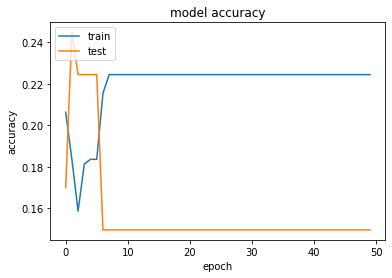

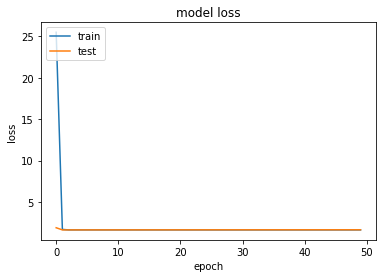

In [22]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_06       0.00      0.00      0.00        31
      GMB_07       0.15      1.00      0.26        22
      GMB_08       0.00      0.00      0.00        25
      GMB_09       0.00      0.00      0.00        36
      GMB_10       0.00      0.00      0.00        33

    accuracy                           0.15       147
   macro avg       0.03      0.20      0.05       147
weighted avg       0.02      0.15      0.04       147



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [25]:
import cv2
import matplotlib.pyplot as plt
image1='forest_test.jpg'

TypeError: ignored

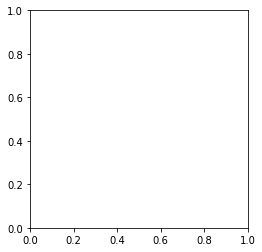

In [26]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('forest_test.jpg')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])